# Natural language processing
BBC-text classifier 

## Importing Module

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

print(f'Tensorflow Version : {tf.__version__}')

Tensorflow Version : 2.8.2


## Problem
- Build and train a classifier for the BBC-text dataset.
- This is a multiclass classification problem.
- Do not use lambda layers in your model.
- The dataset used in this problem is originally published in: http://mlg.ucd.ie/datasets/bbc.html.
- Desired accuracy and validation_accuracy > `91%`

### Preparing data

In [2]:
bbc = pd.read_csv('https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/bbc-text.csv')

#### Explore data

Check data

In [3]:
print(f'Total Data : {bbc.shape[0]}')
print(f'Total Columns : {bbc.shape[1]}\n')

Total Data : 2225
Total Columns : 2



First 10 text from data

In [4]:
bbc.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


More information about data

In [5]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


Visualize Category 

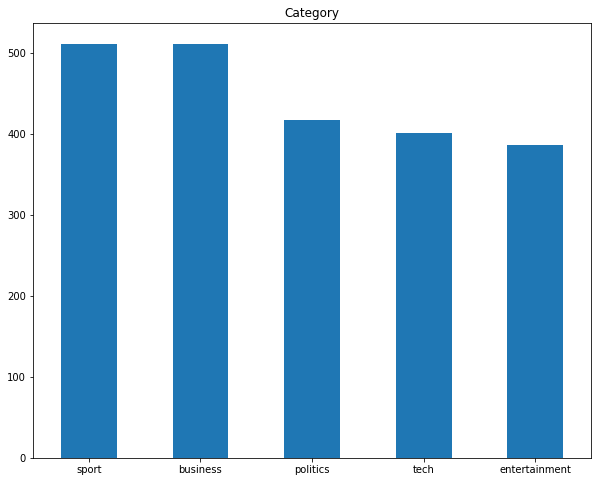

In [6]:
bbc['category'].value_counts().plot(kind='bar', figsize=(10,8), rot=0, title='Category')
plt.show()

### Preparing Model

Set Paramters

In [7]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

training_portion = .8

#### Remove stopwords from text

In [8]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", 
             "an", "and", "any", "are", "as", "at", "be", "because", "been", 
             "before", "being", "below", "between", "both", "but", "by", "could"
             , "did", "do", "does", "doing", "down", "during", "each", "few", 
             "for", "from", "further", "had", "has", "have", "having", "he", 
             "he'd", "he'll", "he's", "her", "here", "here's", "hers", 
             "herself", "him", "himself", "his", "how", "how's", "i", "i'd", 
             "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", 
             "its", "itself", "let's", "me", "more", "most", "my", "myself", 
             "nor", "of", "on", "once", "only", "or", "other", "ought", "our", 
             "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", 
             "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", 
             "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", 
             "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", 
             "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", 
             "you're", "you've", "your", "yours", "yourself", "yourselves" ]

bbc['new_text'] = bbc['text'].apply((lambda x: ' '.join([word for word in x.split() if word not in (stopwords)])))

In [9]:
bbc.head(10)

,category,text,new_text
0,tech,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say will ...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...,howard hits back mongrel jibe michael howard s...
6,politics,blair prepares to name poll date tony blair is...,blair prepares name poll date tony blair likel...
7,sport,henman hopes ended in dubai third seed tim hen...,henman hopes ended dubai third seed tim henman...
8,sport,wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain j...
9,entertainment,last star wars not for children the sixth an...,last star wars not children sixth final star w...


#### Split Data

In [10]:
def train_val_split(sentences, labels, training_split):
  """
  Splits the dataset into training and validation sets
    
  Args:
      sentences (list of string): lower-cased sentences without stopwords
      labels (list of string): list of labels
      training split (float): proportion of the dataset to convert to include in the train set
    
  Returns:
      train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
  """

  # Compute the number of sentences that will be used for training (should be an integer)
  train_size = int(len(sentences)*training_split)

  # Split the sentences and labels into train/validation splits
  train_sentences = sentences[:train_size]
  train_labels = labels[:train_size]

  validation_sentences = sentences[train_size:]
  validation_labels = labels[train_size:]
    
    
  return train_sentences, validation_sentences, train_labels, validation_labels

In [11]:
sentences = bbc['new_text']
labels = bbc['category']

train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, training_portion)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 1780 sentences for training.

There are 1780 labels for training.

There are 445 sentences for validation.

There are 445 labels for validation.


#### Tokenizer

In [12]:
def fit_tokenizer(sentences, num_words, oov_token):
  """
  Instantiates the Tokenizer class on the training sentences
    
  Args:
      sentences (list of string): lower-cased sentences without stopwords to be used for training
      num_words (int) - number of words to keep when tokenizing
      oov_token (string) - symbol for the out-of-vocabulary token
    
  Returns:
      tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
  """
  # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
  tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

   # Fit the tokenizer to the training sentences
  tokenizer.fit_on_texts(sentences)
  
  return tokenizer

In [13]:
tokenizer = fit_tokenizer(train_sentences, vocab_size, oov_tok)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 27285 words

<OOV> token included in vocabulary


Tokenizer Labels

In [14]:
def tokenize_labels(all_labels, split_labels):
  """
  Tokenizes the labels
    
  Args:
      all_labels (list of string): labels to generate the word-index from
      split_labels (list of string): labels to tokenize
    
  Returns:
      label_seq_np (array of int): tokenized labels
  """

  # Instantiate the Tokenizer (no additional arguments needed)
  label_tokenizer = Tokenizer()
    
  # Fit the tokenizer on all the labels
  label_tokenizer.fit_on_texts(all_labels)
    
  # Convert labels to sequences
  label_seq = label_tokenizer.texts_to_sequences(split_labels)
    
  # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
  label_seq_np = np.array(label_seq) - 1
    
  return label_seq_np

In [15]:
train_label_seq = tokenize_labels(labels, train_labels)
test_label_seq = tokenize_labels(labels, val_labels)

#### Convert text to Sequence and Add Padding

In [16]:
def seq_and_pad(sentences, tokenizer, maxlen, padding='pre', truncating='pre'):
  """
  Generates an array of token sequences and pads them to the same length
    
  Args:
      sentences (list of string): list of sentences to tokenize and pad
      tokenizer (object): Tokenizer instance containing the word-index dictionary
      padding (string): type of padding to use
      maxlen (int): maximum length of the token sequence
    
  Returns:
      padded_sequences (array of int): tokenized sentences padded to the same length
  """  
  # Convert sentences to sequences
  sequences = tokenizer.texts_to_sequences(sentences)
    
  # Pad the sequences using the correct padding and maxlen
  padded_sequences = pad_sequences(sequences, 
                                   maxlen=maxlen, 
                                   padding=padding,
                                   truncating=truncating)

  return padded_sequences

In [25]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, max_length, padding=padding_type, truncating=trunc_type)
test_padded_seq = seq_and_pad(val_sentences, tokenizer, max_length, truncating=trunc_type)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {test_padded_seq.shape}")

Padded training sequences have shape: (1780, 120)

Padded validation sequences have shape: (445, 120)


#### Build Model

In [18]:
def build_model(num_words, embedding_dim, maxlen):
  """
  Creates a text classifier model
    
  Args:
      num_words (int): size of the vocabulary for the Embedding layer input
      embedding_dim (int): dimensionality of the Embedding layer output
      maxlen (int): length of the input sequences
    
  Returns:
      model (tf.keras Model): the text classifier model
  """

  # Define Params  
  lr = 1e-3
  adam = tf.keras.optimizers.Adam(learning_rate=lr) # Optimizer
  losses = tf.keras.losses.SparseCategoricalCrossentropy()

  # Define Activation Function
  relu = tf.nn.relu
  softmax = tf.nn.softmax

  # Define model sequential
  model = tf.keras.Sequential()

  # Define layer for Embedding text
  model.add(tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen))

  # Flatten layers and add Dropout
  model.add(tf.keras.layers.GlobalAveragePooling1D())
  model.add(tf.keras.layers.Dropout(0.4))

  # Define fully connected layers
  model.add(tf.keras.layers.Dense(24, activation=relu))
  model.add(tf.keras.layers.Dense(5, activation=softmax))

  # Compile model
  model.compile(optimizer=adam, loss=losses, metrics=['accuracy'])

  # Check Summary Model
  model.summary()

  print('\nModel Succesfully Create')
  
  return model

#### Define Callbacks

In [19]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5", 
                                                      monitor="val_accuracy",
                                                      save_best_only=True,
                                                      verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                  patience=8, 
                                                  mode ="max", 
                                                  verbose=2, 
                                                  restore_best_weights=True)

### Train Model

In [26]:
model = build_model(vocab_size, embedding_dim, max_length)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 5)                 125       
                                                                 
Total params: 16,533
Trainable params: 16,533
Non-trainable params: 0
__________________________________________________

In [27]:
history = model.fit(train_padded_seq, train_label_seq, 
                    epochs=30,
                    validation_data=(test_padded_seq, test_label_seq),
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/30
48/56 [========================>.....] - ETA: 0s - loss: 1.6018 - accuracy: 0.2767
Epoch 1: val_accuracy did not improve from 0.95281
56/56 [==============================] - 1s 7ms/step - loss: 1.6003 - accuracy: 0.2865 - val_loss: 1.5872 - val_accuracy: 0.4517
Epoch 2/30
49/56 [=========================>....] - ETA: 0s - loss: 1.5654 - accuracy: 0.4203
Epoch 2: val_accuracy did not improve from 0.95281
56/56 [==============================] - 0s 4ms/step - loss: 1.5618 - accuracy: 0.4202 - val_loss: 1.5247 - val_accuracy: 0.4472
Epoch 3/30
47/56 [========================>.....] - ETA: 0s - loss: 1.4777 - accuracy: 0.4581
Epoch 3: val_accuracy did not improve from 0.95281
56/56 [==============================] - 0s 4ms/step - loss: 1.4652 - accuracy: 0.4618 - val_loss: 1.3901 - val_accuracy: 0.4899
Epoch 4/30
50/56 [=========================>....] - ETA: 0s - loss: 1.3014 - accuracy: 0.5688
Epoch 4: val_accuracy did not improve from 0.95281
56/56 [==========================

### Visualization result

In [22]:
def visualize_result(history):
  '''Function for Visual result'''
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper left')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

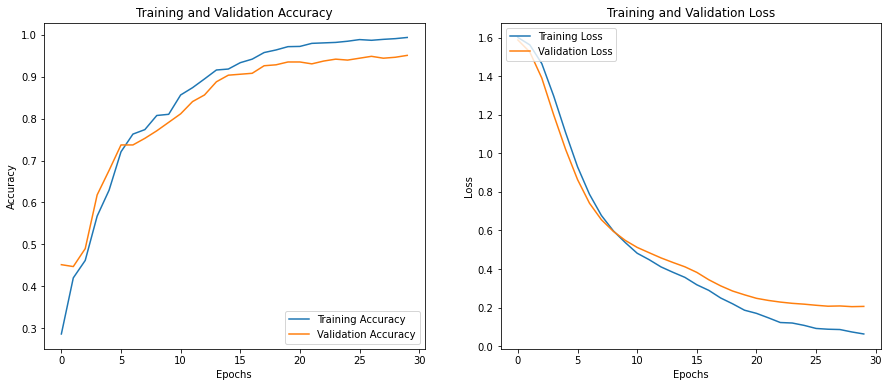

In [28]:
visualize_result(history)

### Download Model

In [24]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>